In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mypath = r"C:\Users\Eddie\OneDrive\Desktop\Python\Python for Data Analysis\Practices\Data Statistics\election analysis\American Election\Election data\Election_Donor_Data.csv"

In [4]:
df = pd.read_csv(mypath, low_memory= False)

In [5]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [7]:
df = df[[#'cmte_id', 'cand_id',
         'cand_nm', 'contbr_nm', 'contbr_city',
         'contbr_st', #'contbr_zip',
         'contbr_employer', 'contbr_occupation',
         'contb_receipt_amt', 'contb_receipt_dt', 
        # 'receipt_desc', 'memo_cd','memo_text', 'form_tp', 'file_num'
        ]]

In [8]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,NONE,RETIRED,300.0,20-JUN-11


# How much was donated and what was the average donation ?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001731 non-null  object 
 1   contbr_nm          1001731 non-null  object 
 2   contbr_city        1001712 non-null  object 
 3   contbr_st          1001727 non-null  object 
 4   contbr_employer    988002 non-null   object 
 5   contbr_occupation  993301 non-null   object 
 6   contb_receipt_amt  1001731 non-null  float64
 7   contb_receipt_dt   1001731 non-null  object 
dtypes: float64(1), object(7)
memory usage: 61.1+ MB


In [10]:
df["contb_receipt_amt"].value_counts()

contb_receipt_amt
 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: count, Length: 8079, dtype: int64

In [11]:
df["contb_receipt_amt"].mean()

298.2351500951853

In [12]:
# the average donation of each donor is around $298

In [13]:
df["contb_receipt_amt"].std()

3749.666723269043

In [14]:
# that a huge std, meaning there is other large donors messing up with the distribution of the donations.

In [15]:
print(f"The average donation of each donor was ${df["contb_receipt_amt"].mean():.2f} with a std ${df["contb_receipt_amt"].std():.2f}")

The average donation of each donor was $298.24 with a std $3749.67


In [16]:
top_donors = df["contb_receipt_amt"].copy()

In [17]:
top_donors

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [18]:
top_donors.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [19]:
# we can notice that there were some negative values, and they are quite large in this dataset

# The reason is because that FEC records refund in the contribution receipt amount

In [20]:
top_donors = top_donors[top_donors > 0]

top_donors.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [21]:
# look for top 10 common donate amount

In [22]:
top_donors.value_counts().head(10)

contb_receipt_amt
100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: count, dtype: int64

In [23]:
# create a series of common donations

# we want to verify if the donations were likely to be round number like 10, 20, 15

In [24]:
common_don = top_donors[top_donors < 2600]

In [25]:
common_don.hist(bins = 50)

<Axes: >

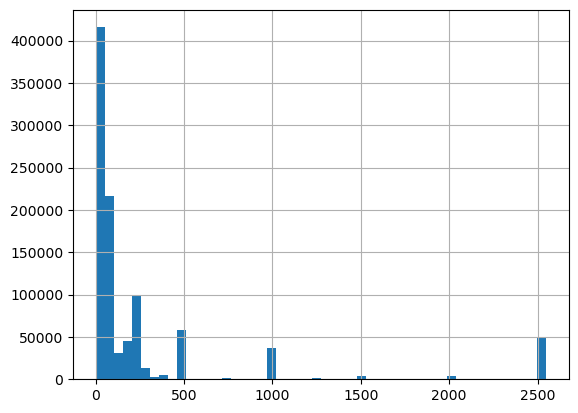

In [26]:
plt.show()

# Donation separated by candidates and by parties

In [27]:
# create a new party column with data of candidates and their affiliations 

In [28]:
candidates = df.cand_nm.unique()
# unique() return unique values in that column

In [29]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [30]:
# Affiliation of each candidate
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


In [31]:
df["Party"] = df.cand_nm.map(party_map)

In [32]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [33]:
# to get rid of any contribution (contb_receipt_amt) that are negatives

In [34]:
df = df[df.contb_receipt_amt > 0]

In [35]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [36]:
# Aggregate the dataset by candidates

# 1: we look at total money received by each candidate

# 2: look at total number of donations & total amount of donations

In [37]:
df.groupby(by = "cand_nm")["contb_receipt_amt"].count().sort_values()

cand_nm
McCotter, Thaddeus G                  73
Johnson, Gary Earl                  1234
Pawlenty, Timothy                   3844
Huntsman, Jon                       4066
Roemer, Charles E. 'Buddy' III      5844
Perry, Rick                        12709
Bachmann, Michelle                 13082
Cain, Herman                       20052
Santorum, Rick                     46245
Gingrich, Newt                     46883
Romney, Mitt                      105155
Paul, Ron                         143161
Obama, Barack                     589127
Name: contb_receipt_amt, dtype: int64

In [38]:
# The data here represents how many contribution those candidates received/ how many donors

# we notice that Obama was a front runner because he was the only Democratic candidate 

# Understandably, he did not have to compete with any other democratic nominees for the donors 

In [39]:
# Group by candidates and display the total amount donated

df.groupby(by = "cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [40]:
cand_money = df.groupby(by = "cand_nm")["contb_receipt_amt"].sum()

In [41]:
cand_money.index[0]

'Bachmann, Michelle'

In [42]:
# Simplify the data to be more readable with for loop

# set up index
i = 0

for donation in cand_money:
    print(f"The candidate: {cand_money.index[i]} raised {donation:.2f} of dollars")
    print("\n")
    i += 1

The candidate: Bachmann, Michelle raised 2711439.29 of dollars


The candidate: Cain, Herman raised 7101081.89 of dollars


The candidate: Gingrich, Newt raised 12832769.69 of dollars


The candidate: Huntsman, Jon raised 3330373.48 of dollars


The candidate: Johnson, Gary Earl raised 566961.60 of dollars


The candidate: McCotter, Thaddeus G raised 39030.00 of dollars


The candidate: Obama, Barack raised 135877427.24 of dollars


The candidate: Paul, Ron raised 21009619.83 of dollars


The candidate: Pawlenty, Timothy raised 6004819.48 of dollars


The candidate: Perry, Rick raised 20305754.00 of dollars


The candidate: Roemer, Charles E. 'Buddy' III raised 373009.90 of dollars


The candidate: Romney, Mitt raised 88335907.53 of dollars


The candidate: Santorum, Rick raised 11043159.31 of dollars




In [43]:
type(cand_money)

pandas.core.series.Series

In [44]:
# Demonstrate it with a bar graph

ax = cand_money.plot(kind = "bar", title = "Candidates' Donors")


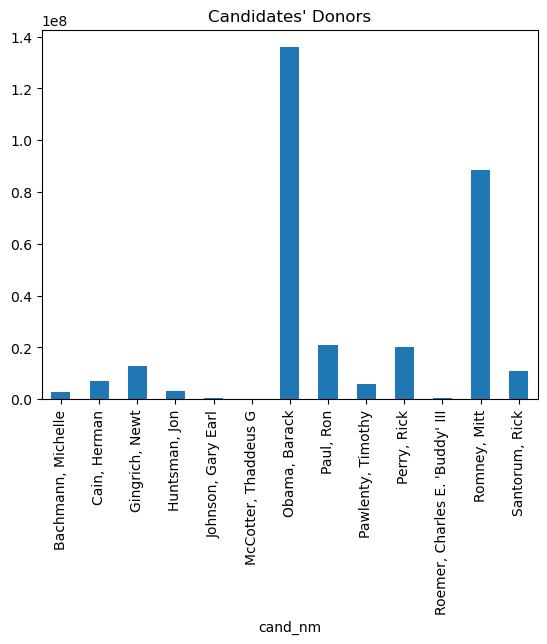

In [45]:
plt.show()

In [46]:
# Sum by Parties

In [47]:
ax2 = df.groupby("Party")["contb_receipt_amt"]

In [48]:
ax2.count()

Party
Democrat      589127
Republican    402348
Name: contb_receipt_amt, dtype: int64

In [49]:
ax2.sum()

Party
Democrat      1.358774e+08
Republican    1.736539e+08
Name: contb_receipt_amt, dtype: float64

In [50]:
ax2.sum().plot(kind = "bar", title = "Amount of donors by Parties")

<Axes: title={'center': 'Amount of donors by Parties'}, xlabel='Party'>

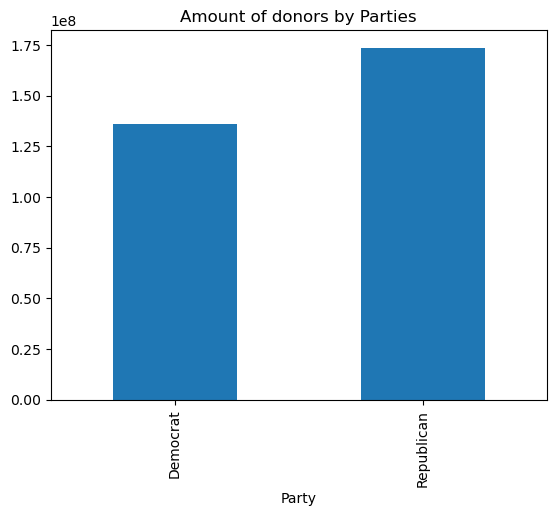

In [51]:
plt.show()

In [52]:
# It looks like Obama could not compete against all the Republicans, but he certainly had the advantage

# It is because the Rep fundings were splitted across multiple candidates

# However, we gotta acknowledge the existence of Romney as potential rival to Obama in the president race.

# What were the demographics of the donors?

In [53]:
# we make a dataframe with the ocupation 

# By using pivot table to extract and organise the data 

In [74]:
df.shape

(991475, 9)

In [54]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,Party
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [55]:
ocupation_df = df.pivot_table(values = "contb_receipt_amt",
                              index = "contbr_occupation",
                              columns = "Party",
                              aggfunc = "sum")

In [56]:
ocupation_df.shape

(45067, 2)

In [57]:
ocupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [58]:
ocupation_df.count()

Party
Democrat      29166
Republican    21081
dtype: int64

In [59]:
# We would love to know which occupations contributed the highest amount and maybe top 10 

# We see that some ocupation like "Zookeeper", "Zoology Education" contributed $35 isnt going to have a big effect in the large scope

In [60]:
# we going to set our cut off at 1 mill total or more

In [61]:
ocupation_df = ocupation_df[ocupation_df.sum(1) > 1000000]

In [62]:
ocupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41
CHAIRMAN,496547.00,1296092.75
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


In [63]:
ocupation_df.plot(kind = "barh", figsize = (10,15), cmap = "seismic")

<Axes: ylabel='contbr_occupation'>

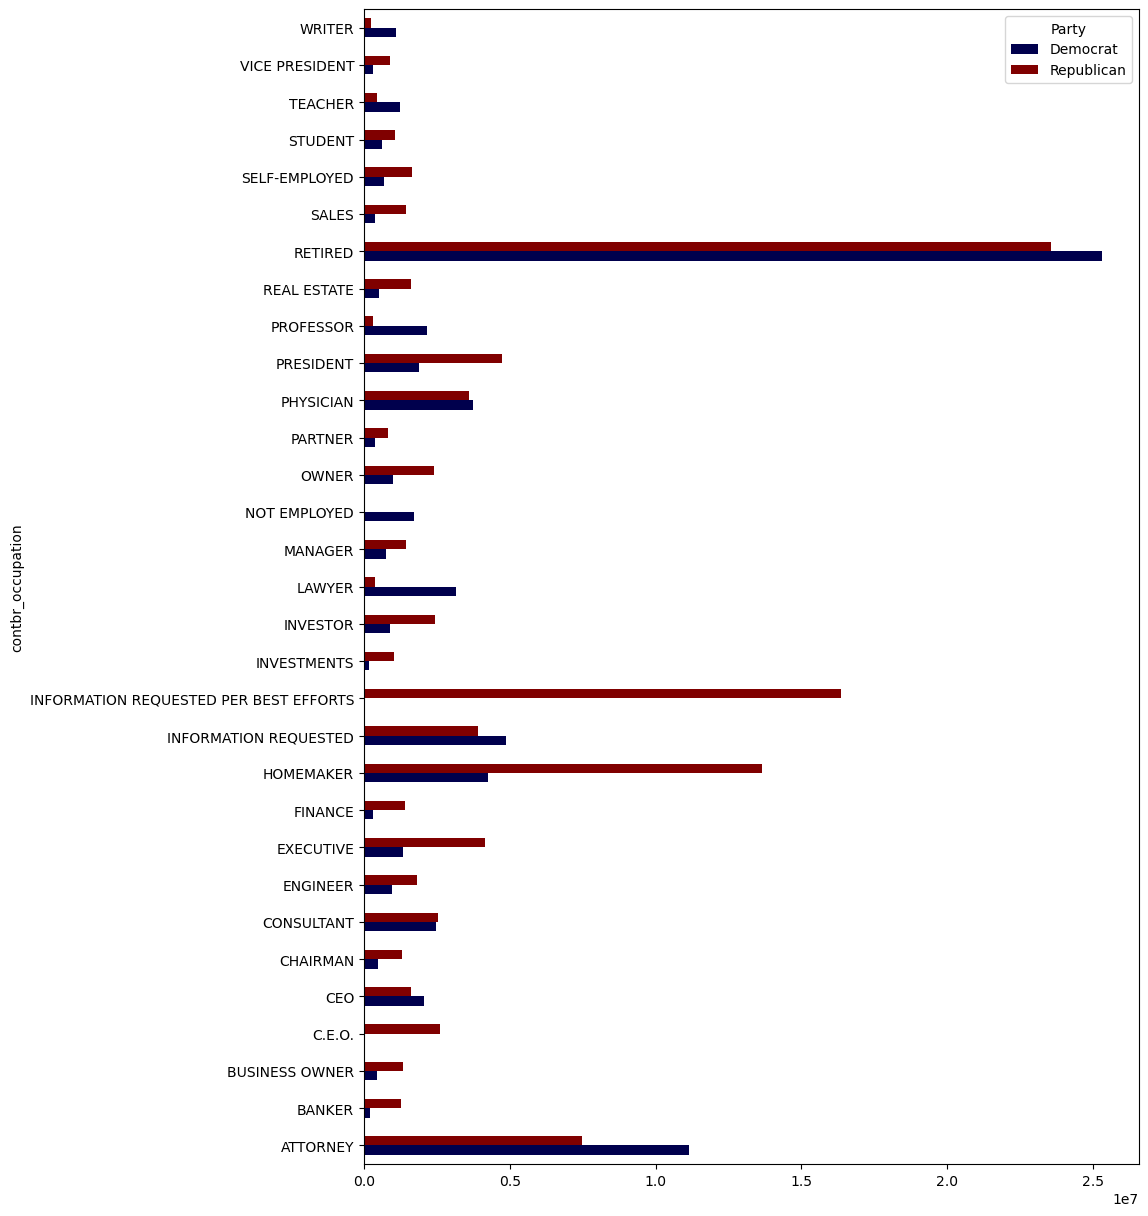

In [64]:
plt.show()

In [65]:
# we notice that Information requested and INFORMATION REQUESTED PER BEST EFFORTS were not real occupations 

# we are gonna get rid of those 2

# The CEO and C.E.O are related so we gonna add those data together

In [66]:
ocupation_df = ocupation_df.drop(["INFORMATION REQUESTED", "INFORMATION REQUESTED PER BEST EFFORTS"])

ocupation_df.loc["CEO"] = ocupation_df.loc["CEO"] + ocupation_df.loc["C.E.O."]

ocupation_df.drop("C.E.O.", inplace = True)

In [67]:
ocupation_df.plot(kind = "barh", figsize = (10,15), cmap = "seismic")

<Axes: ylabel='contbr_occupation'>

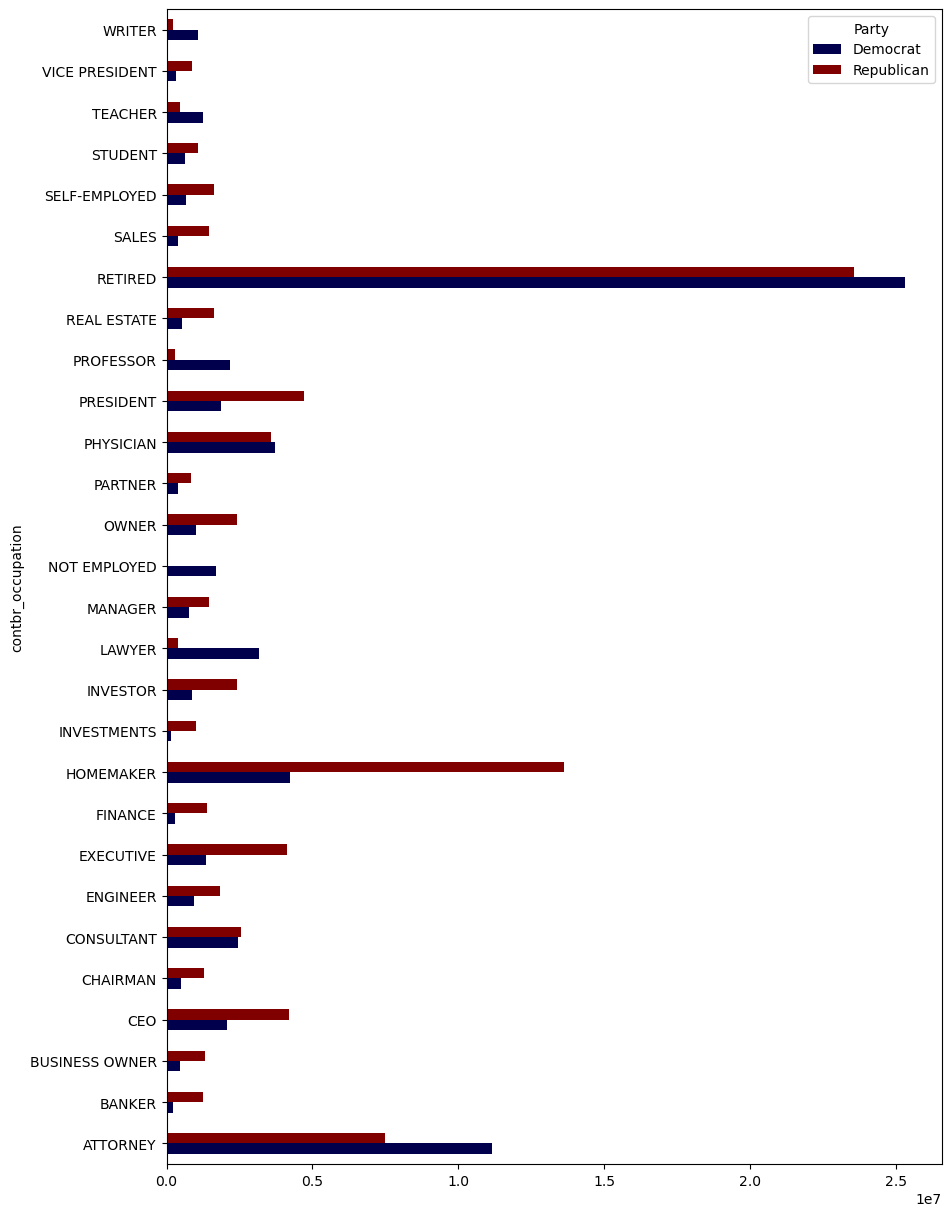

In [68]:
plt.show()

In [ ]:
# retired voters contributed the highest amount

# we see that people who were unemployed/ not employed had contributed 